In [120]:
from cogent3.maths.matrix_exponential_integration import expected_number_subs
from cogent3 import get_app, load_aligned_seqs
import numpy as np

from numpy import array

GTR_model = get_app("model", sm = "GTR", 
                unique_trees = True, time_het = "max", optimise_motif_probs = True, 
                show_progress = False, opt_args = dict(max_restarts=5))

no_degenerates = get_app(
    "omit_degenerates",
    moltype = None,
    gap_is_degen = True,
    motif_length = 1,
)



In [97]:
import pathlib
import matplotlib.pyplot as plt
paths = list(pathlib.Path("../data/16s-10").glob("**/*.json"))

In [98]:
def get_matrix_pi(path):
    aln = load_aligned_seqs(path)
    aln1 = no_degenerates(aln)
    result = GTR_model(aln1)
    Edge_name = result.tree.get_node_names(includeself = False)[0]
    Q = result.lf.get_rate_matrix_for_edge(Edge_name)
    pi = result.lf.get_motif_probs()
    return Q, pi


In [195]:
Q1, pi1 = get_matrix_pi(paths[0])
Q2, pi2 = get_matrix_pi(paths[9])




In [222]:
R = array([[-103, 2, 1, 100], [2,-23, 1, 20], [1, 40, -43, 2], [1, 1, 2, -4]], dtype=float)
p = [0.1, 0.2, 0.3, 0.4]

In [229]:
t_range = np.linspace(0,2,10)

s_exp_numb_sub_value = list()
n_exp_numb_sub_value = list()


for t in t_range:
    s_exp_numb_sub_value.append(expected_number_subs(pi2, Q1, t))


for t in t_range:
    n_exp_numb_sub_value.append(expected_number_subs(pi2, R, t))


<function matplotlib.pyplot.show(close=None, block=None)>

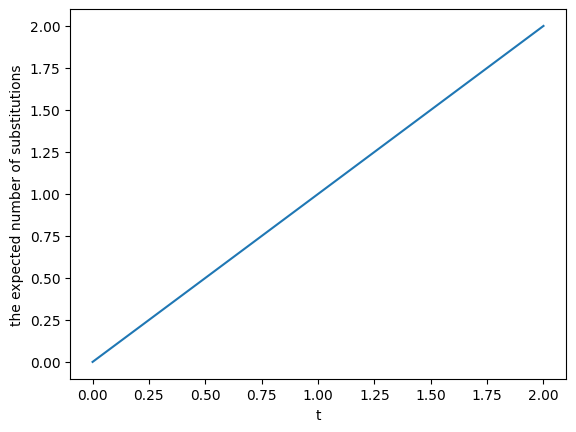

In [232]:
plt.plot(t_range, s_exp_numb_sub_value)
plt.xlabel('t')
plt.ylabel('the expected number of substitutions')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

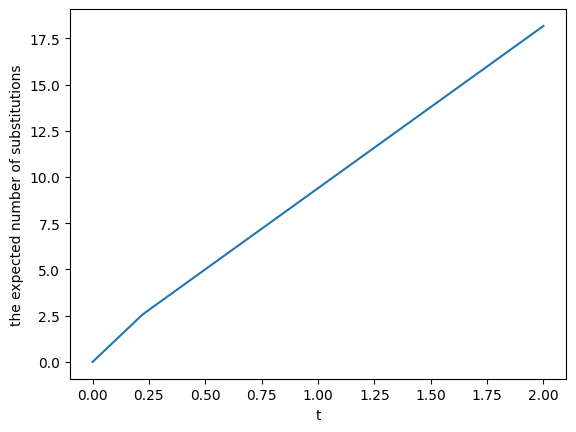

In [233]:
plt.plot(t_range, n_exp_numb_sub_value)
plt.xlabel('t')
plt.ylabel('the expected number of substitutions')
plt.show